# <center>Lab 7-1: Tips</center>

## 1. Maximum Likelihood Estimation (MLE)
> 표본 데이터로 우도 함수를 최대로하는 pdf에서(모집단의 확률 분포에 최대로 근사시켜), 모수인 θ(theta)를 구하는 최대 우도법으로 머신러닝을 이해해보자.
 
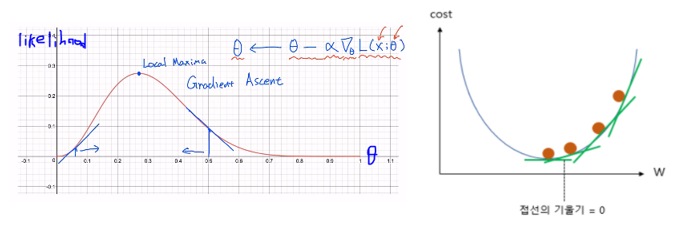
cost function과 w의 관계식에서 Gradient Descent하는 머신러닝은 MLE에서 θ(theta)의 pdf에서 최대우도를 구하는 원리와 같음. 

## 2. overfitting
> 주어진 데이터에대해서 가장 잘 설명하는 pdf를 찾다보니(MLE) overfitting이 일어남   

![image](https://user-images.githubusercontent.com/59557720/108513616-328c8500-7306-11eb-9608-c1089a1ec860.png)

**해결책**
1. more data
2. Less features
3. Regularization - Early stopping, 네트워크 사이즈 다운, weight 크기 다운, dropout, Batch normalization
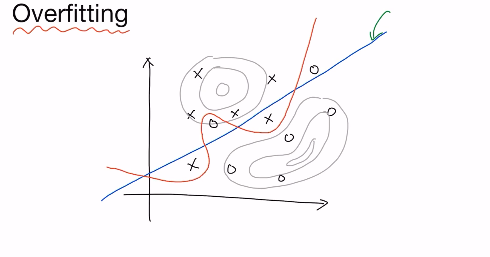

**DNN 기초 접근법**
1. 뉴럴넷을 구성함
2. 오버피팅이 일어났는지 체크하기(오버피팅이 일어나면 regularization을 추가하고, 문제없으면 뉴럴넷의 사이즈를 키운다.)
3. 2를 계속 반복하면서 아키텍처를 구성함

# <center> 스케일링과 L2 규제항을 추가해 학습하기</center>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
# For reproducibility
torch.manual_seed(1)

In [3]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [4]:
'''스케일링으로 데이터의 범위 조정'''

mu = x_train.mean(dim=0)

sigma = x_train.std(dim=0)

norm_x_train = (x_train - mu) / sigma

print(norm_x_train)

tensor([[-1.0674, -0.3758, -0.8398],
        [ 0.7418,  0.2778,  0.5863],
        [ 0.3799,  0.5229,  0.3486],
        [ 1.0132,  1.0948,  1.1409],
        [-1.0674, -1.5197, -1.2360]])


## Model

In [5]:
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)

    def forward(self, x):
        return self.linear(x)

In [6]:
model = MultivariateLinearRegressionModel()

# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1e-1) # learnin rate는 기울기가 explode 혹은 vanishing되지 않도록 적절한 값을 넣어준다.

In [7]:
def train_with_regularization(model, optimizer, x_train, y_train):
    nb_epochs = 20
    for epoch in range(nb_epochs):

        # H(x) 계산
        prediction = model(x_train)

        # cost 계산
        cost = F.mse_loss(prediction, y_train)
        
        # l2 norm 계산
        l2_reg = 0
        for param in model.parameters():
            l2_reg += torch.norm(param)
            
        cost += l2_reg              # L2 norm 규제항을 cost에 더해 학습시켜 모델을 더욱 로버스트하게 만든다.

        # cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch+1, nb_epochs, cost.item()
        ))

In [8]:
train_with_regularization(model, optimizer, norm_x_train, y_train)

Epoch    1/20 Cost: 29572.126953
Epoch    2/20 Cost: 18846.189453
Epoch    3/20 Cost: 12087.833984
Epoch    4/20 Cost: 7791.030273
Epoch    5/20 Cost: 5049.380371
Epoch    6/20 Cost: 3297.136230
Epoch    7/20 Cost: 2176.398682
Epoch    8/20 Cost: 1459.326172
Epoch    9/20 Cost: 1000.453369
Epoch   10/20 Cost: 706.787231
Epoch   11/20 Cost: 518.841553
Epoch   12/20 Cost: 398.553284
Epoch   13/20 Cost: 321.564819
Epoch   14/20 Cost: 272.288330
Epoch   15/20 Cost: 240.747742
Epoch   16/20 Cost: 220.558167
Epoch   17/20 Cost: 207.633453
Epoch   18/20 Cost: 199.358429
Epoch   19/20 Cost: 194.059296
Epoch   20/20 Cost: 190.664978
